In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [2]:

file_path = r'C:\Users\Kashi\Downloads\Company_Data.csv'

# Load the dataset
df = pd.read_csv(file_path)

df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Define the bin edges and labels
bins = [0, 5, 10, float('inf')]  # Customize the bin edges as needed
labels = ['Low', 'Medium', 'High']  # Categories for the bins


In [5]:
# Create a new categorical column based on the "Sales" column
df['SalesCategory'] = pd.cut(df['Sales'], bins=bins, labels=labels, right=False)


In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [7]:
df = df.drop('Sales', axis = True) 

In [8]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of columns to be label encoded
columns_to_encode = ['ShelveLoc', 'Urban', 'US', 'SalesCategory']

# Apply label encoding to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])


In [10]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


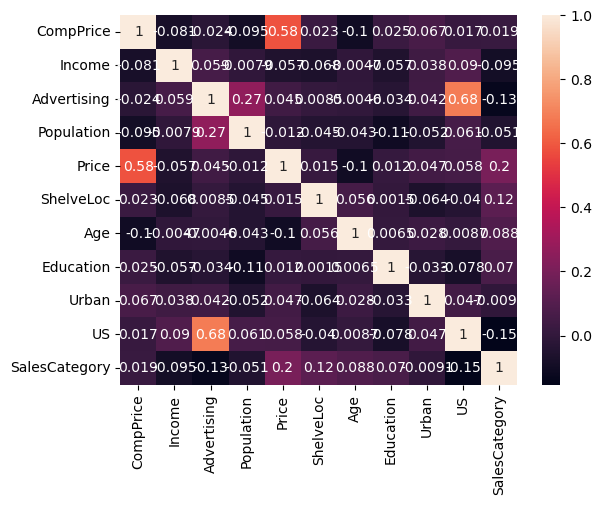

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

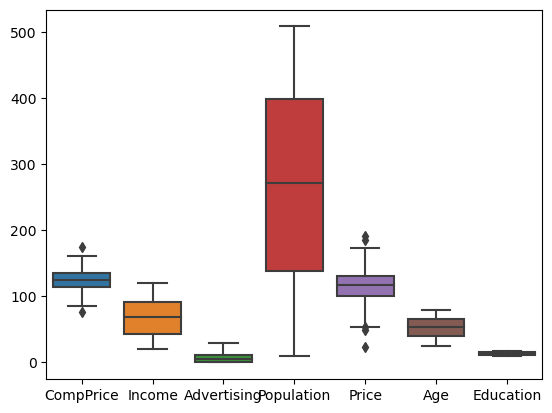

In [17]:
numerical_features = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
sns.boxplot(data=df[numerical_features])
plt.show()

In [11]:
x = df.iloc[:,0:10]
y = df['SalesCategory']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier using Entropy Criteria

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

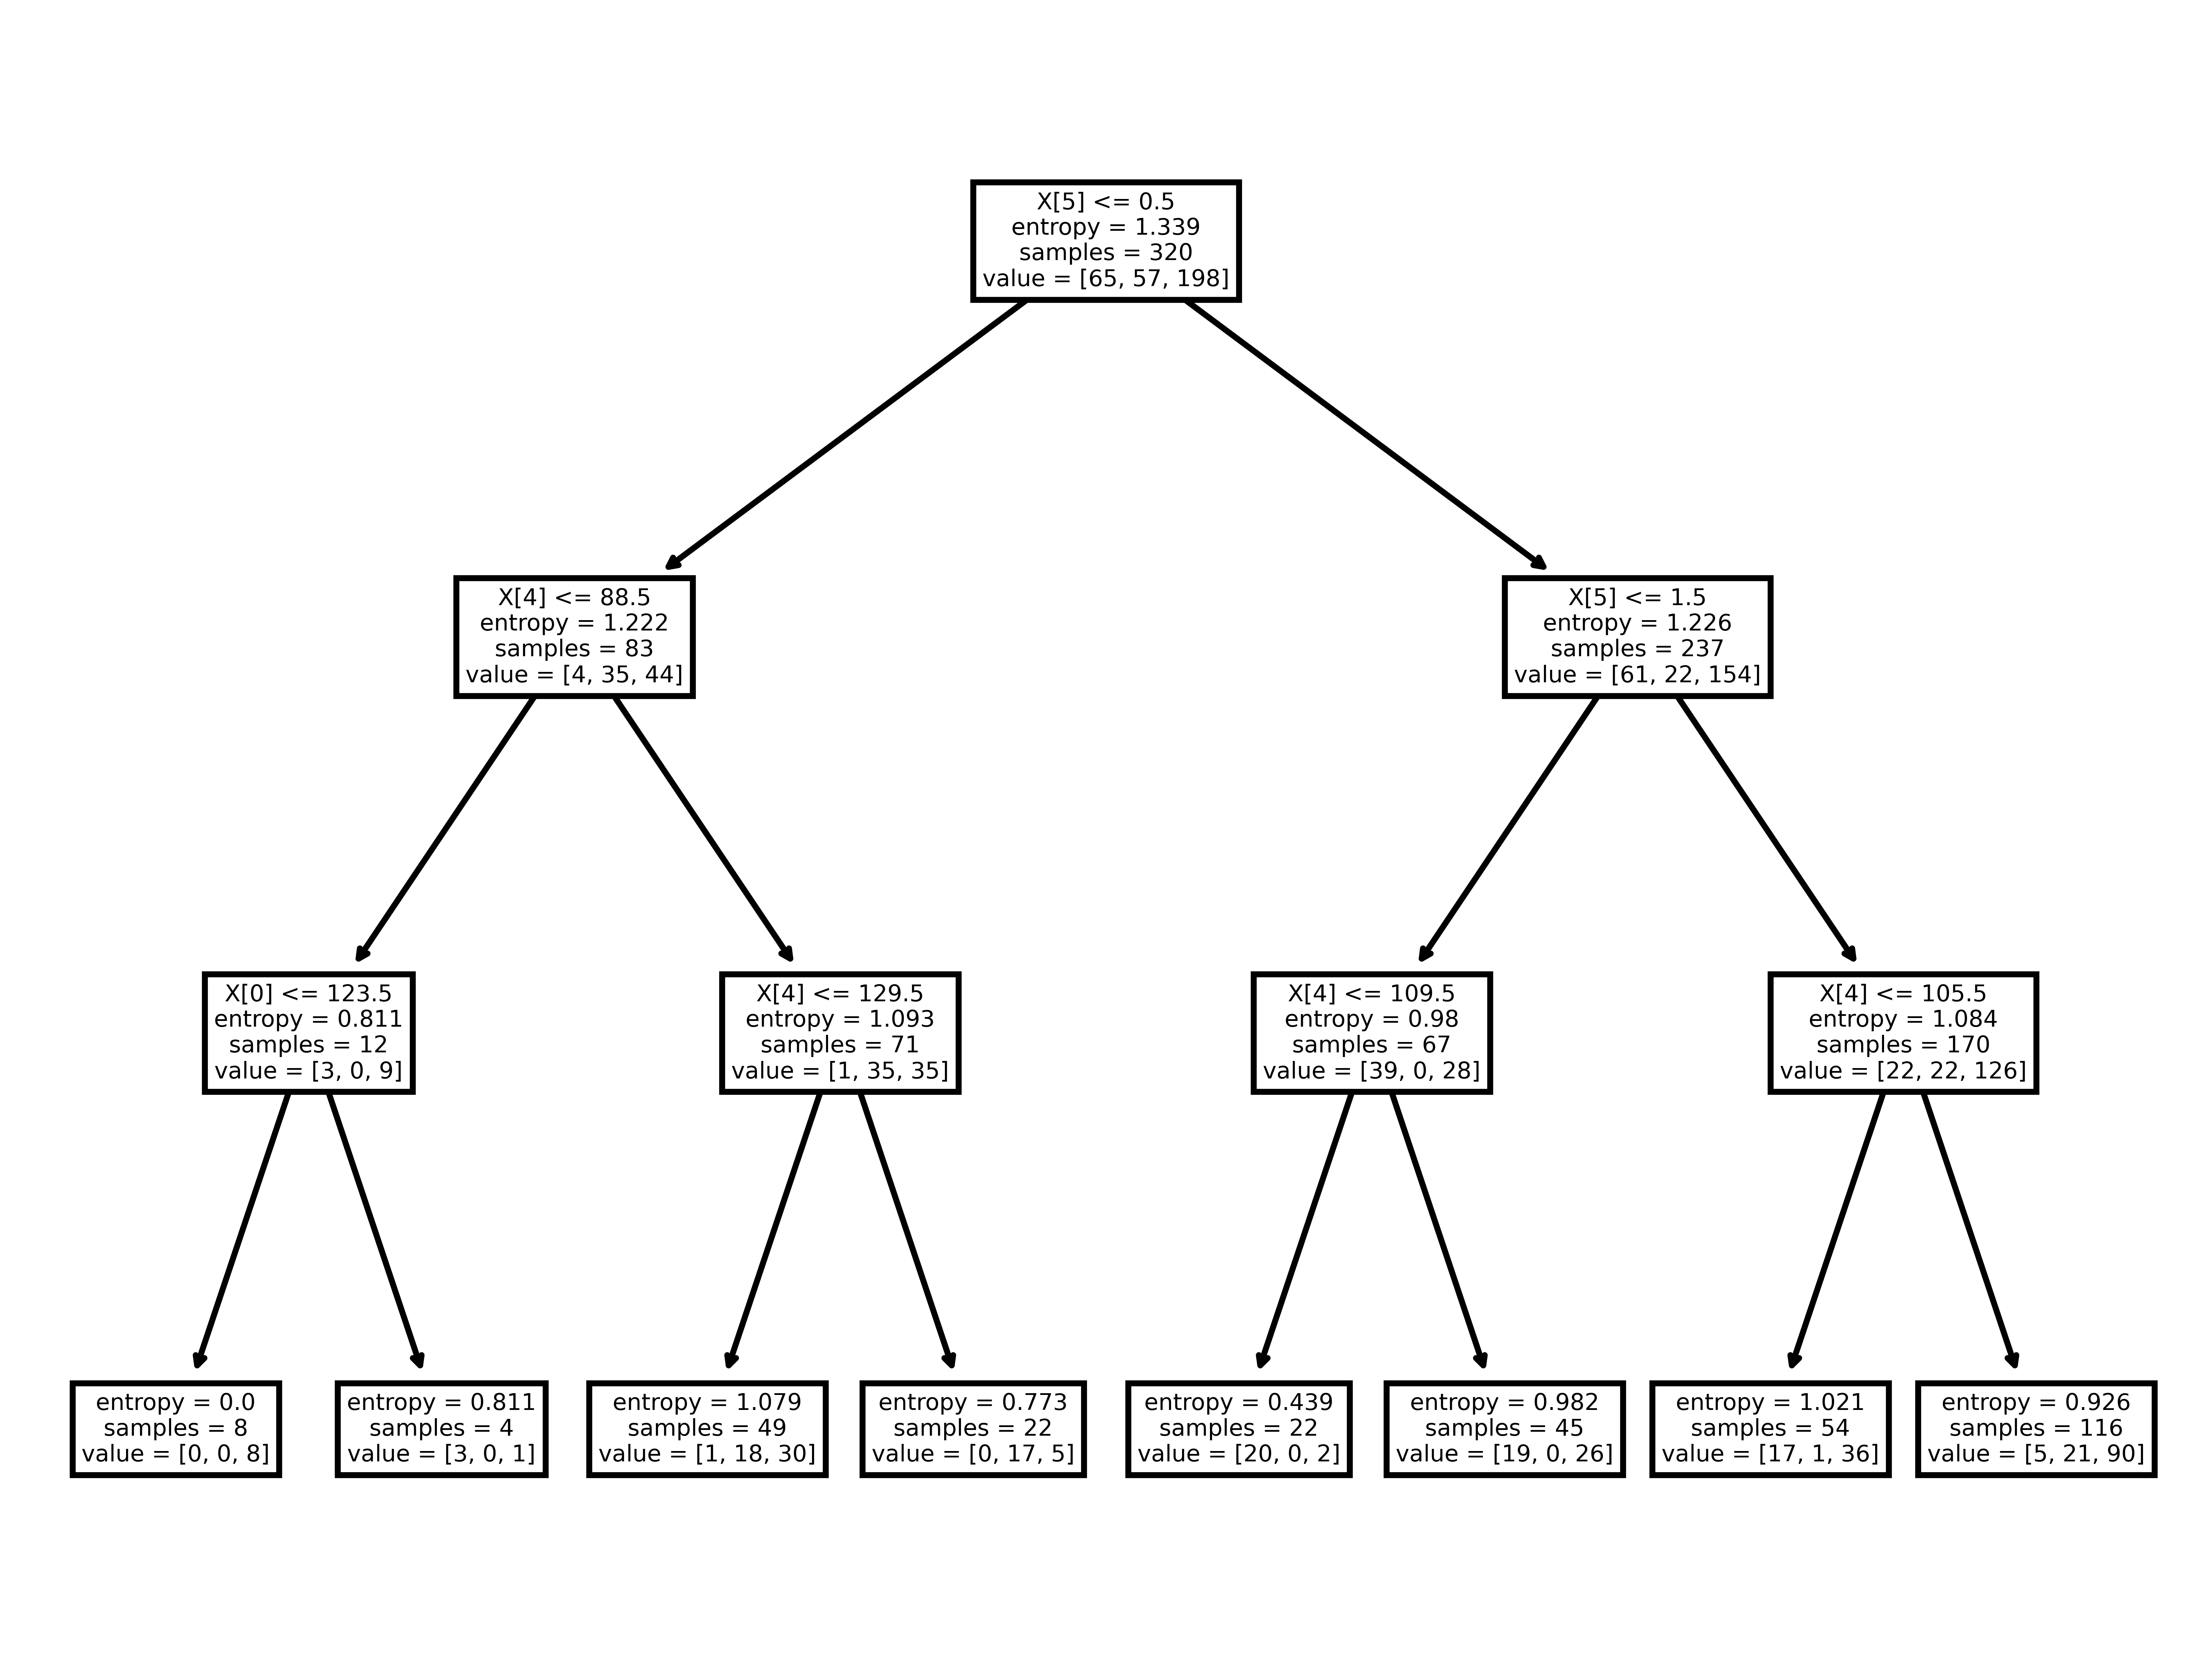

In [22]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);


In [23]:

from sklearn.tree import plot_tree



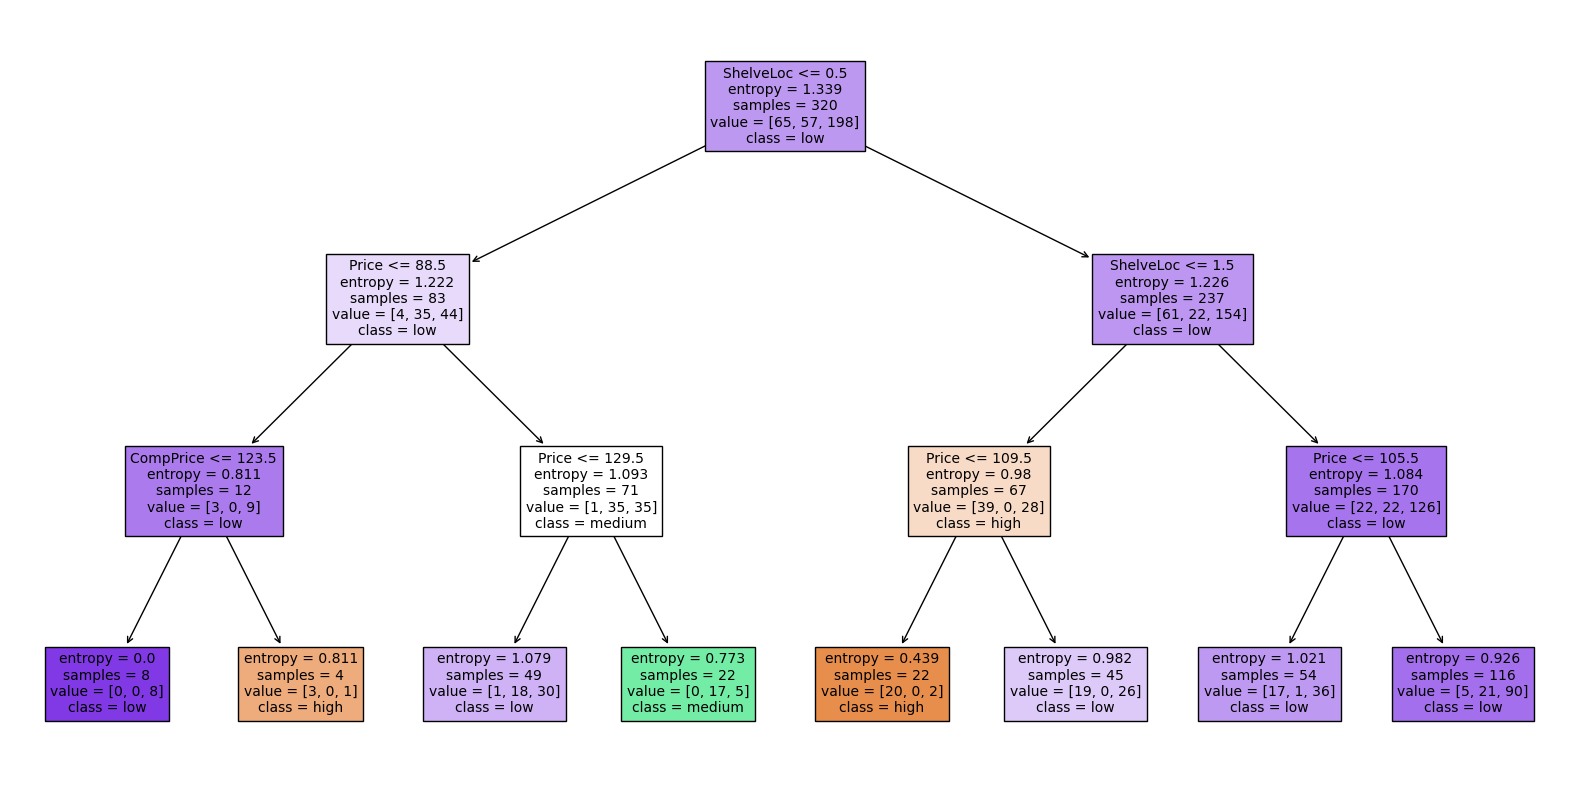

In [24]:
feature_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

# Define class names (your target classes)
class_names = ['high', 'medium', 'low']

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, fontsize=10, max_depth=4)
plt.show()


In [25]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
# pd.Series(preds).value_counts() # getting the count of each category 
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.50      0.10      0.17        20
           2       0.63      0.96      0.76        46

    accuracy                           0.65        80
   macro avg       0.71      0.50      0.51        80
weighted avg       0.66      0.65      0.58        80



In [27]:
model.score(x_train,y_train)

0.71875

In [28]:
model.feature_importances_

array([0.04672134, 0.        , 0.        , 0.        , 0.39788397,
       0.55539469, 0.        , 0.        , 0.        , 0.        ])

In [51]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv=5)
print(results)
print(results.mean())

[0.6875 0.65   0.6    0.55   0.575 ]
0.6125


In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion': ['gini', 'entropy'],
        'max_depth': range(5, 31, 5),  # Range from 5 to 30 with a step of 5
    'min_samples_split': range(2, 11, 2),  # Range from 2 to 10 with a step of 2
    'min_samples_leaf': range(1, 11, 2)  # Range from 1 to 10 with a step of 2
}



# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best estimator (model)
best_dt_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


0.6